<a href="https://colab.research.google.com/github/fclubb/SciRes-Earthquakes/blob/main/Practical_3_magnitude_frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scientific Research Project 7 - Practical 3

## Magnitude-frequency plots
Last week, we started to explore the distribution of earthquakes through time. In this practical, we're going to look at how we can use these distributions to explore seismic hazard.

A fundamental step in seismic hazard analysis is making **magnitude-frequency plots**: where we plot the size of events versus their frequency. Many, many natural hazards show that there is a power law relationship between these two variables. As magnitude increases, frequency decreases, but the relationship is not linear.

If we can work out the relationship between magnitude and frequency, it gives us an idea of how often an event of a given magnitude might occur over the time period in question.

So, let's get started, and make our magnitude-frequency plots for the San Francisco area for 1900-2019.
****

**Firstly, copy the notebook to your Google Drive using the COPY TO DRIVE button.**

Now we'll import the packages that we need again. This should be familiar from last time.

In [ ]:
# import several helpful packages that we'll use
import numpy as np # linear algebra
import pandas as pd # data processing. We can read in csv files using pd.read_csv('path/to/csv-file')
import matplotlib.pyplot as plt # package for making figures
import matplotlib.cm as cm # for getting colourmaps
from scipy import stats # for linear regression


Now we have to load our earthquake data into Google Colab. This is the exact same as we did last week using the USGS CSV file that you downloaded. To do this, click the small folder icon on the left hand bar and then click `Upload to Session Storage`. You can then navigate to the CSV file we downloaded and add it to Google Colab.

**NOTE** - you will have to re-upload the data to Google Colab whenever you want to run this notebook. 

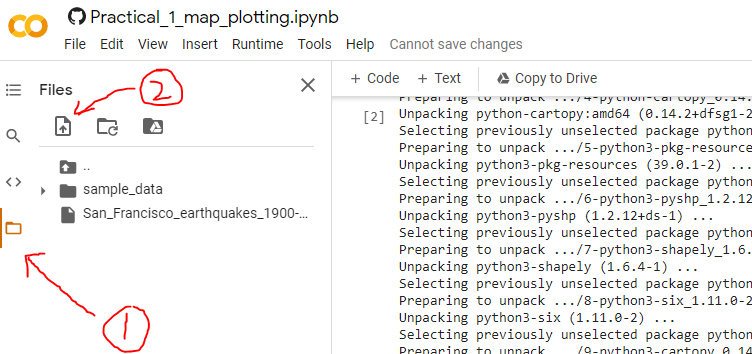

Once you have uploaded the file and you can see it in the left hand bar, we can then load it into Python again using the code in the cell below.

In [ ]:
df = pd.read_csv('San_Francisco_earthquakes_1900-2020.csv') # This needs to correspond to the name of the file you uploaded. You can change it to represent your own file 

In [ ]:
df

## Getting the number of earthquakes of each magnitude

The first step in our analysis is to group our database by magnitude. We want to end up with different classes that represent earthquakes of similar magnitudes. We'll create a series of classes with a magnitude interval of 0.5, for example:

*   Magnitude 4.5 - 5 (4.5 is the lowest magnitude that we downloaded)
*   Magnitude 5 - 5.5
*   Magnitude 5.5 - 6
* etc...





In [ ]:
# first define the bins. Use the step parameter to control the interval spacing of the bins (we will use spacings of 0.5 magnitude)
step = 0.5
starting_magnitude = 4.5
ending_magnitude = 8.5
bins = np.arange(starting_magnitude, ending_magnitude, step)
print(bins)

# then separate the dataframe into each bin
df['mag_bins'] = pd.cut(df['mag'], bins=bins, include_lowest=True)

If we now look at the dataframe, you should see there is a new column called `mag_bins` which tells you which class each earthquake falls into. The first one, for example, is in the magnitude range 4.49 - 5.0.

In [ ]:
df

Ok, so we've worked out which earthquakes are in each class. Now we need to get the number, or *frequency*, of earthquakes in each class.
To do that we can use the `groupby` function to group the earthquakes by class, and count the number in each class:

In [ ]:
frequency_df = df.groupby('mag_bins')['mag'].count().reset_index()

Now let's look at our new table, called `frequency_df`. We can see that it has 2 columns: `mag_bins` which tells us the edges of each class, and the number of earthquakes in each class (the column titled `mag`).

In [ ]:
frequency_df

## Making the magnitude-frequency plot

Ok, we've set up our data in the right format. From looking at the table above, you should see that we have many, many more smaller earthquakes compared to large ones (128 earthquakes of magnitude 4.5 - 5, compared to only 1 magnitude 7.5 - 8). This means that it's very unlikely that there is a *linear* relationship between magnitude and frequency of earthquakes.

Indeed, we know that most natural phenomena follow what's called a *power-law* distribution, where there are more small events than large ones. The best way of plotting a power-law is to use a **logarithmic** scale, which allows us to easily compare small and large numbers of events. 

You should remember from the lecture that we can use the laws of logarithms to transform a power law relationship into logarithmic space. Let's set out our predicted relationship between the number of earthquakes (*N*) and the magnitude (*M*):

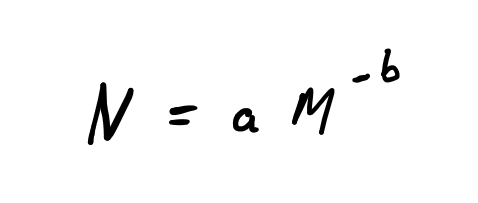

where *a* and *b* are constants. 

We can then take the log of both sides of this equation:

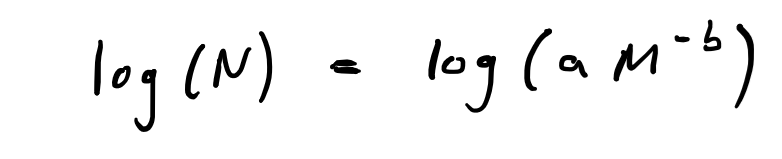

We need to know two rules of logarithms:

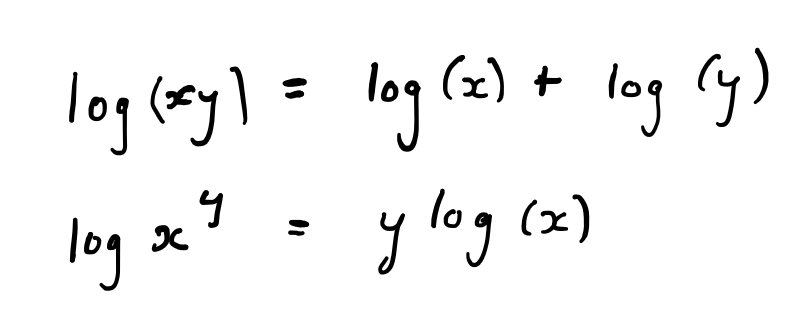

We can use these two rules to transform our equation to:

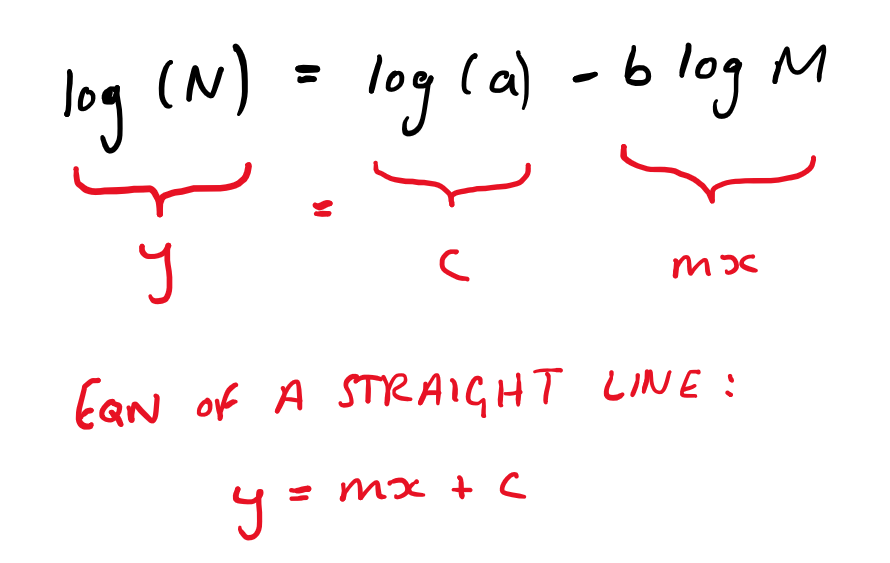

This shows that a *power-law* relationship in linear space is equivalent to a *straight line* in log-log space! We're going to explore that in our plotting. This will allow us to get the **b value** for the region: from the equation, you can see that the b value is the gradient of the straight line in logarithmic space (the exponent of the power law relationship).  From the lecture, you should know that we can use the b value to compare the seismic hazard of different regions.

We're going to create 2 new variables, which will be lists of the magnitude and frequency extracted from our dataframe. For the magnitude, we'll get the centre value of each class (so for magnitude 4.5 - 5, our value would be 4.75).

In [ ]:
magnitude = frequency_df['mag_bins'].apply(lambda x: x.mid).to_numpy()
# round the values to 2 decimal places
magnitude = np.round(magnitude, 2)

In [ ]:
frequency = frequency_df['mag'].to_numpy()

Now let's take the log of frequency. Magnitude is already a log scale, so it doesn't need to change.

In [ ]:
log_frequency = np.log(frequency)

Now we can make our plot. As before, we'll use a scatter plot and have a look at the data. We need to set the frequency scale to `log` which will perform the logarithm calculation for us.


In [ ]:
# define the figure size
plt.figure(figsize=(8,6))

# make the scatter plot of magnitude and frequency
plt.scatter(magnitude, log_frequency, c='red', s=200, edgecolors='black')

# add axis labels
plt.xlabel('Earthquake magnitude', fontsize=16)
plt.ylabel('log frequency', fontsize=16)

# increase the fontsize of the ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('San_Francisco_mag-freq.png')

--- 

## Exercise 1

1. Take a look at the magnitude-frequency plot above. Does it look like a power-law would be a good fit to the data? Why, or why not? (We will try fitting one in the next exercise). 

2. From looking at this plot, how many times in the period from 1900 - 2019 was there a Magnitude 5.5 - 6 earthquake in the region?

3. If this trend continued into the future, how often would we expect a Magnitude 5.5 - 6 earthquake to occur in San Francisco?

2. Investigate how changing the interval of the magnitude classes changes the plot. For example, you could try changing the interval to 0.1 magnitude bins. Save your output as a separate plot.


---







## Fitting a power law to the data

The next step is to fit a power law to these data and see if it's a good fit. This will also allow us to estimate our **b value** for the region (the gradient of the fit in logarithm space, or the exponent of the power law). 
We already found the log of the frequencies from earlier on:

In [ ]:
log_frequency

Now that we've got the logarithms, let's fit a linear regression. Remember, a linear regression in logarithmic space the **same as a power law**.

Let’s create a linear regression model using our magnitude and frequency data. We first have to check if there are any classes that didn't have any earthquakes in them. These can cause problems in the code, so we have to create what's called a *mask* to remove them:

In [ ]:
# Check if there are any problems with the data because there were no earthquakes in a class
mask = log_frequency >= 0
print(mask)

Now we can run our linear regression model! You'll see this outputs some values that might be familiar to you:
* slope: this is the gradient of the straight line in the linear regression. This is our **b value**!
* intercept: this is our y-intercept of the straight line
* r_value: We can use this to work out the $R^2$ value, or how well the data fits a straight line. To do this we just have to multiply this value by itself.
* p_value: This tells us how confident we can be that our data are actually well described by a linear regression. If $p < 0.05$ then we can say that our data appear to be described by a power law at the 95% confidence interval. 

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(magnitude[mask], log_frequency[mask])

Let's print out these outputs to see what the fit looks like:

In [ ]:
# What's the slope of the regression? This is our b value
slope

In [ ]:
# What's the R^2 value? This describes how close the data are to a straight line. R^2 can vary between 0 and 1: if R^2 = 1, then all the data would lie on the line.
r2 = r_value*r_value
r2

In [ ]:
# How confident are we in this? Let's print out the p value. if p < 0.05 then we can be confident at a 95% confidence interval that our regression is significant.
p_value

---
## Exercise 2

1. What is the **b value** of the magnitude-frequency plot for the San Francisco region?

2. How well does a power-law fit the data? Can we say that this is statistically significant to a 95% confidence level?

3. How does this **b value** compare to the b values from Southern California and from the worldwide seismicity data? What does this tell us about the number of small events in the San Francisco region as a proportion of the total, compared to these other datasets?
 
---

## Making the final plot - adding the regression

Now we've calculated our linear regression, we can add it to our magnitude frequency plot to see how well it fits the data.

In [ ]:
# calculate the linear regression model for adding the data. We're just using the equation of a straight line to predict a model value of Y for each magnitude.
y = slope*magnitude + intercept
print(y)

In [ ]:
# define the figure size
plt.figure(figsize=(8,6))

# make the scatter plot of magnitude and frequency
plt.scatter(magnitude, log_frequency, c='red', s=200, edgecolors='black')

# plot the linear regression as a line
plt.plot(magnitude, y, color='black', linestyle='--', label = 'Power law fit')

# add axis labels
plt.xlabel('Earthquake magnitude', fontsize=16)
plt.ylabel('log frequency', fontsize=16)

# increase the fontsize of the ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# add a legend
plt.legend(loc='upper right', fontsize=14)

# add the b value to the plot, rounded to 2 decimal places, using plt.text. The first number is the position on the X axis, the second is the position on the Y axis
# and the s parameter is the text that you want to write.
plt.text(7.0, 4, s='b = '+str(np.round(slope,2)), fontsize=20)

plt.savefig('San_Francisco_mag-freq_regression.png')